In [1]:
import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

import matplotlib.pyplot as plt
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


In [2]:
training_data, validation_data, test_data = network3.load_data_shared()

/home/almir.cunha/.pyenv/versions/3.7.17/lib/python3.7/site-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."
/home/almir.cunha/projects/neural-networks-and-deep-learning/src/network3.py:321: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  input=conv_out, ds=self.poolsize, ignore_border=True)


Epoch 0:
Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 9.83%
This is the best validation accuracy to date.
The corresponding test accuracy is 9.82%
Accuracy by Class:
    Class 7: 0.0
    Class 2: 0.0
    Class 1: 0.0
    Class 0: 0.0
    Class 4: 1.0
    Class 9: 0.0
    Class 5: 0.0
    Class 6: 0.0
    Class 3: 0.0
    Class 8: 0.0
Precision:
    Class 7: 0.0
    Class 2: 0.0
    Class 1: 0.0
    Class 0: 0.0
    Class 4: 0.09823929571828731
    Class 9: 0.0
    Class 5: 0.0
    Class 6: 0.0
    Class 3: 0.0
    Class 8: 0.0
Recall:
    Class 7: 0.0
    Class 2: 0.0
    Class 1: 0.0
    Class 0: 0.0
    Class 4: 1.0
    Class 9: 0.0
    Class 5: 0.0
    Class 6: 0.0
    Class 3: 0.0
    Class 8: 0.0
Total Accuracy: 0.0982
Total Precision: 0.00982392957182873
Total Recall: 0.1
Epoch 1:
Training mini-batch number 5000
Training mini-batch number 60

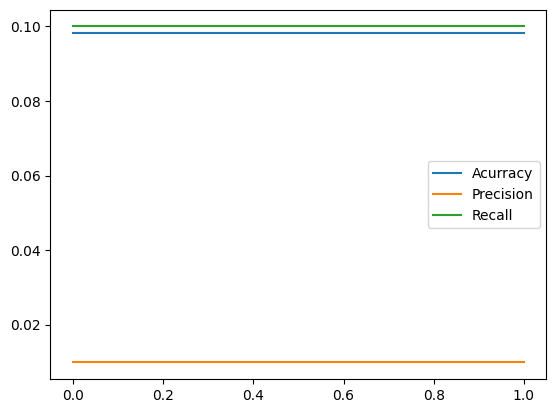

In [3]:
epochs = 2
mini_batch_size = 10
eta = 3.0
net = Network([
        ConvPoolLayer(
            image_shape=(mini_batch_size, 1, 28, 28), 
            filter_shape=(20, 1, 5, 5), 
            poolsize=(2, 2)
        ),
        FullyConnectedLayer(n_in=20*12*12, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)
    ],
    mini_batch_size
)
total_accurancy_series, total_precision_series, total_recal_series = net.SGD(training_data, epochs, mini_batch_size, eta, validation_data, test_data)
y = np.array(list(range(epochs)))
plt.plot(y, total_accurancy_series, label="Acurracy")
plt.plot(y, total_precision_series, label="Precision")
plt.plot(y, total_recal_series, label="Recall")
plt.legend()
plt.show()